In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import netCDF4 as nc
import XL
import os
import time
import pysolar
import common
import datetime

In [17]:
test_path = os.path.expanduser("/home/danilo/dados-ic/maoradflux1longM1.c2/maoradflux1longM1.c2.20151111.040000.custom.nc")
test_path = os.path.expanduser("/home/danilo/ftp.archive.arm.gov/bernardinelid1/185487/maoradflux1longM1.c2.20131223.040000.nc")
dataset = nc.Dataset(test_path, "r")
dataset.variables.keys()

odict_keys(['base_time', 'time_offset', 'time', 'time_bounds', 'downwelling_shortwave', 'source_downwelling_shortwave', 'qc_downwelling_shortwave', 'clearsky_downwelling_shortwave', 'downwelling_longwave', 'qc_downwelling_longwave', 'clearsky_downwelling_longwave', 'upwelling_shortwave', 'qc_upwelling_shortwave', 'clearsky_upwelling_shortwave', 'upwelling_longwave', 'qc_upwelling_longwave', 'clearsky_upwelling_longwave', 'diffuse_downwelling_shortwave', 'source_diffuse_downwelling_shortwave', 'qc_diffuse_downwelling_shortwave', 'clearsky_diffuse_downwelling_shortwave', 'direct_downwelling_shortwave', 'source_direct_downwelling_shortwave', 'qc_direct_downwelling_shortwave', 'clearsky_direct_downwelling_shortwave', 'clearsky_status', 'cloudfraction_longwave', 'cloudfraction_shortwave', 'cloudfraction_shortwave_status', 'visible_cloud_optical_depth', 'brightness_temperature', 'cloud_radiating_temperature', 'clearsky_emissivity_longwave', 'cosine_zenith', 'cloud_transmissivity_shortwave', 

In [3]:
    # variables without mask
    base_time = dataset["base_time"][0]
    time_offset = dataset["time_offset"][:]
    timestamp = time_offset + base_time
    Fdn_clr = dataset["clearsky_downwelling_shortwave"][:]
    Fdn_all = dataset["downwelling_shortwave"][:]
    Fdn_clr_d = dataset["clearsky_direct_downwelling_shortwave"][:]
    rad_cf_short = dataset["cloudfraction_shortwave"][:]
    rad_cf_long = dataset["cloudfraction_longwave"][:]
    # variables with mask
    Fup_all = dataset["upwelling_shortwave"][:]
    Fdn_all_d = dataset["direct_downwelling_shortwave"][:]
    cod = dataset["visible_cloud_optical_depth"][:]

    T = np.exp(-cod)
    solar_zenith = []
    for t in timestamp:
        datim = datetime.datetime.fromtimestamp(t)
        ang = pysolar.solar.get_altitude(common.lat_mao, common.lon_mao, datim)
        solar_zenith.append(ang)
    solar_zen_cosine = np.sin(np.radians(solar_zenith))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:15: RuntimeWarning: overflow encountered in exp


In [4]:
def h(dat):
    return dat[np.isfinite(dat)]

In [5]:
(B1, B2) = XL.get_B(Fdn_clr, Fdn_all, Fup_all, Fdn_clr_d, Fdn_all_d, T)
cloud_albedo = XL.get_cloud_albedo(B1, B2)
cloud_albedo_cor = XL.cloud_albedo_correction(cloud_albedo, solar_zen_cosine)
cloud_fraction = XL.get_cloud_fraction(cloud_albedo, B1)
cloud_fraction_cor = XL.get_cloud_fraction(cloud_albedo_cor, B1)

/home/danilo/atmosphere-br/danlessa/XL.py:76: RuntimeWarning: invalid value encountered in less
  B1 / B2 < 0.07) | ~np.isfinite(B1) | ~np.isfinite(B2)
/home/danilo/atmosphere-br/danlessa/XL.py:76: RuntimeWarning: invalid value encountered in greater
  B1 / B2 < 0.07) | ~np.isfinite(B1) | ~np.isfinite(B2)


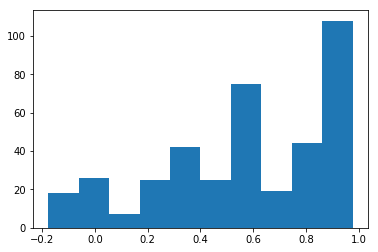

In [11]:
plt.hist(h(B1))
plt.show()